In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
data=pd.read_csv('data/data.csv')

In [74]:
baseColumns = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12',
       'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_EXPENDITURE_12',
       'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT',
       'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE',
       'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

X= data[baseColumns]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['CAT_GAMBLING'] = le.fit_transform(X['CAT_GAMBLING'])

C:\Users\Huawei\AppData\Local\Temp\ipykernel_15912\211689055.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CAT_GAMBLING'] = le.fit_transform(X['CAT_GAMBLING'])


In [75]:
y = np.array(data['DEFAULT'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

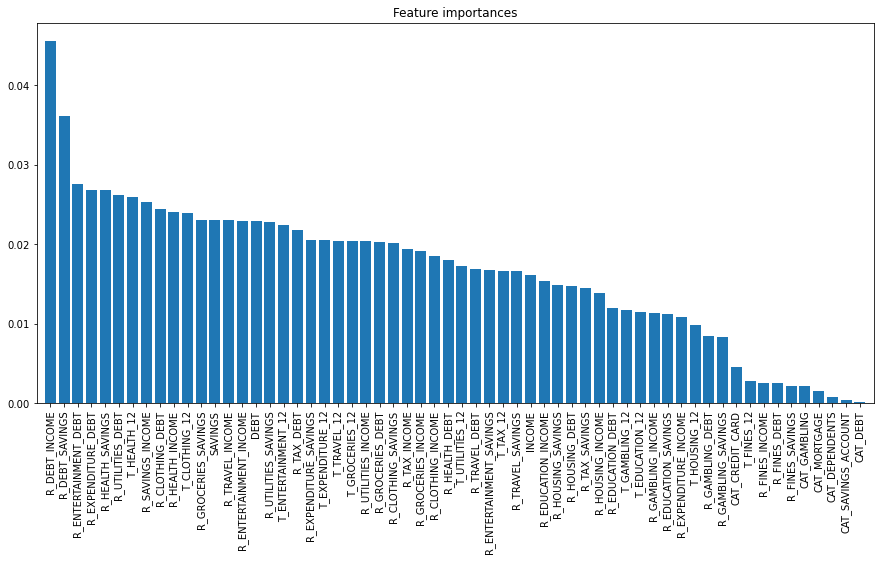

In [5]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

Accuracy: 0.7541666666666667
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       172
           1       0.70      0.24      0.35        68

    accuracy                           0.75       240
   macro avg       0.73      0.60      0.60       240
weighted avg       0.74      0.75      0.71       240



In [8]:
not_important = X_train.columns[sorted_indices][importances[sorted_indices]<0.001]
not_important

Index(['CAT_DEPENDENTS', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEBT'], dtype='object')

In [31]:
X_1=X.drop(not_important, axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(
    X_1, y, stratify=y, test_size=0.3, random_state=42
)

model.fit(X1_train, y_train)
predictions = model.predict(X1_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

# a little better in general 

Accuracy: 0.7541666666666667
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.74      0.21      0.32        68

    accuracy                           0.75       240
   macro avg       0.75      0.59      0.59       240
weighted avg       0.75      0.75      0.70       240



In [186]:
rf_classifier.fit(X_train, y_train)
importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
not_important = X_train.columns[sorted_indices][importances[sorted_indices]<0.003]
X_1=X.drop(not_important, axis=1)


X1_train, X1_test, y_train, y_test = train_test_split(
    X_1, y, stratify=y, test_size=0.3, random_state=42
)
model.fit(X1_train, y_train)
predictions = model.predict(X1_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_test, predictions))
# best changing not_important

Accuracy: 0.7625
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.76      0.24      0.36        68

    accuracy                           0.76       240
   macro avg       0.76      0.60      0.61       240
weighted avg       0.76      0.76      0.71       240



In [56]:
X_2=data.drop(["DEFAULT","CREDIT_SCORE","CUST_ID"],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_2['CAT_GAMBLING'] = le.fit_transform(X_2['CAT_GAMBLING'])

X2_train, X2_test, y_train, y_test = train_test_split(
    X_2, y, stratify=y, test_size=0.3, random_state=42
)
rf_classifier.fit(X2_train, y_train)

importances = rf_classifier.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

model.fit(X2_train, y_train)
predictions = model.predict(X2_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

not_important = X2_train.columns[sorted_indices][importances[sorted_indices]<0.003]
X_3=X_2.drop(not_important, axis=1)
X3_train, X3_test, y_train, y_test = train_test_split(
    X_3, y, stratify=y, test_size=0.3, random_state=42
)
model.fit(X3_train, y_train)
predictions = model.predict(X3_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))
#test on data with all cols on start

Accuracy: 0.7416666666666667
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       172
           1       0.65      0.19      0.30        68

    accuracy                           0.74       240
   macro avg       0.70      0.58      0.57       240
weighted avg       0.72      0.74      0.69       240

Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.73      0.24      0.36        68

    accuracy                           0.76       240
   macro avg       0.74      0.60      0.60       240
weighted avg       0.75      0.76      0.71       240

